# READING KEPSEISMIC LIGHT CURVES
All the data used in this paper is in this git repository.
If you need other stars, the files can be found at:
https://archive.stsci.edu/prepds/kepseismic/

The light curves are corrected using the procedures described in Garcia et al. 2011, MNRAS 414, 6
https://academic.oup.com/mnrasl/article/414/1/L6/976074

and the gaps are interpolated using inpainting techniques based on a multiscale cosine transform as described in 
Garcia et al. 2014,568, 10 and Pires et al. 2015
https://www.aanda.org/articles/aa/full_html/2014/08/aa23326-13/aa23326-13.html
https://www.aanda.org/articles/aa/full_html/2015/02/aa22361-13/aa22361-13.html

For any further question e-mail rafael.garcia@cea.fr

## Acknowledgements and references if these data is used in another published work

If you use any of these data, please add a reference to Noraz et al. 2022, García et al. 2011, 2014 and Pires et al. 2015.


In [2]:
import astropy.io as io
from astropy.io import fits
import sys
import os
import matplotlib.pyplot as plt

Give the file name and path of the fits file to be read

In [3]:
lc_file_in = "./LC/Fold80d/kplr001849159_0_COR_filt_inp.fits"
file_basename = os.path.basename(lc_file_in)
kic = "KIC" + (file_basename.split("kplr",1)[1])[:9]
#Filename for the saved figure
print_filename = kic+'.png'

Reading the file and verifying the codding of the bits

In [4]:
data = io.fits.getdata(lc_file_in, ext=0)
time = data[:,0]
flux = data[:,1]
# Checking little endian codding to ensure compatibility with some computers
sys_byteorder = ('>', '<')[sys.byteorder == 'little']
if time.dtype.byteorder not in ('=', sys_byteorder):
    time = time.byteswap().newbyteorder(sys_byteorder)
if flux.dtype.byteorder not in ('=', sys_byteorder):
    flux = flux.byteswap().newbyteorder(sys_byteorder)    

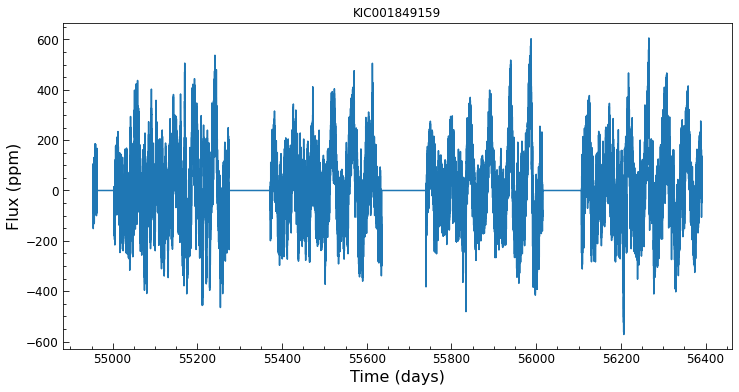

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(time,flux)
plt.minorticks_on()
plt.tick_params(axis='both', which='major',direction='in',width=0.8,length=6)
plt.tick_params(axis='both', which='minor',direction='in',width=0.8,length=3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(kic,fontsize=12)
plt.xlabel('Time (days)', fontsize=16)
plt.ylabel('Flux (ppm)', fontsize=16)
plt.savefig (print_filename,format='png',facecolor='white',transparent=False, dpi=250)
plt.show()